In [1]:
#importing data using curl and renaming it
!curl https://topcs.blob.core.windows.net/public/FlightData.csv -o flightdata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  3 1552k    3 48746    0     0  30735      0  0:00:51  0:00:01  0:00:50 30754
 38 1552k   38  591k    0     0   233k      0  0:00:06  0:00:02  0:00:04  233k
100 1552k  100 1552k    0     0   529k      0  0:00:02  0:00:02 --:--:--  529k


# Reading the data

In [2]:
import pandas as pd

df = pd.read_csv('flightdata.csv')
df.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


# Cleaning the data and preparing it 

In [3]:
df.shape

(11231, 26)

In [4]:
df.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DISTANCE', 'Unnamed: 25'],
      dtype='object')

In [5]:
df.isnull().values.any()

True

In [6]:
df.isnull().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [7]:
df = df.drop('Unnamed: 25', axis=1)
df.isnull().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [8]:
r_df = df[["MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_DEP_TIME", "ARR_DEL15"]]
r_df.isnull().sum()

MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_DEP_TIME      0
ARR_DEL15       188
dtype: int64

In [9]:
r_df[r_df.isnull().values.any(axis=1)].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,NaN
179,1,10,7,MSP,DTW,1348,NaN
184,1,10,7,MSP,DTW,625,NaN
210,1,10,7,DTW,MSP,1200,NaN
478,1,22,5,SEA,JFK,2305,NaN


In [10]:
r_df.fillna({'ARR_DEL15': 1})

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,1905,0.0
1,1,1,5,DTW,MSP,1345,0.0
2,1,1,5,ATL,SEA,940,0.0
3,1,1,5,SEA,MSP,819,0.0
4,1,1,5,SEA,DTW,2300,0.0
...,...,...,...,...,...,...,...
11226,12,30,5,DTW,ATL,1005,0.0
11227,12,30,5,SEA,MSP,1525,0.0
11228,12,30,5,DTW,SEA,1959,0.0
11229,12,30,5,ATL,SEA,1530,0.0


In [12]:
r_df = r_df.fillna({'ARR_DEL15': 1})
r_df.iloc[177:185]

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
177,1,9,6,MSP,SEA,701,1.0
178,1,9,6,DTW,JFK,1527,0.0
179,1,10,7,MSP,DTW,1348,1.0
180,1,10,7,DTW,MSP,1540,0.0
181,1,10,7,JFK,ATL,1325,0.0
182,1,10,7,JFK,ATL,610,0.0
183,1,10,7,JFK,SEA,1615,0.0
184,1,10,7,MSP,DTW,625,1.0


In [13]:
import math

for index, row in r_df.iterrows():
    
    r_df.loc[index, 'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME'] / 100)


In [14]:
r_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_DEP_TIME,ARR_DEL15
0,1,1,5,ATL,SEA,19,0.0
1,1,1,5,DTW,MSP,13,0.0
2,1,1,5,ATL,SEA,9,0.0
3,1,1,5,SEA,MSP,8,0.0
4,1,1,5,SEA,DTW,23,0.0


In [15]:
r_df = pd.get_dummies(r_df, columns=['ORIGIN', 'DEST'])
r_df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
0,1,1,5,19,0.0,1,0,0,0,0,0,0,0,0,1
1,1,1,5,13,0.0,0,1,0,0,0,0,0,0,1,0
2,1,1,5,9,0.0,1,0,0,0,0,0,0,0,0,1
3,1,1,5,8,0.0,0,0,0,0,1,0,0,0,1,0
4,1,1,5,23,0.0,0,0,0,0,1,0,1,0,0,0


# Building the ML model

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_x, test_x, train_y, test_y = train_test_split(r_df.drop('ARR_DEL15', axis=1), r_df['ARR_DEL15'], test_size=0.2, random_state=42)

In [18]:
train_x.shape

(8984, 14)

In [19]:
test_x.shape

(2247, 14)

In [21]:
print(train_y.shape)
print(test_y.shape)

(8984,)
(2247,)


In [23]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=13)
model.fit(train_x, train_y)

RandomForestClassifier(random_state=13)

In [24]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8642634623943035

In [25]:
test_x.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ORIGIN_ATL,ORIGIN_DTW,ORIGIN_JFK,ORIGIN_MSP,ORIGIN_SEA,DEST_ATL,DEST_DTW,DEST_JFK,DEST_MSP,DEST_SEA
10347,12,1,4,19,0,0,0,1,0,1,0,0,0,0
2199,3,21,1,8,0,0,1,0,0,0,0,0,1,0
9704,11,10,4,18,0,1,0,0,0,0,0,0,1,0
1662,3,1,2,16,0,1,0,0,0,1,0,0,0,0
7364,8,28,7,7,1,0,0,0,0,0,0,0,0,1


In [26]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

In [27]:
roc_auc_score(test_y, probabilities[:, 1])

0.7014819895830565

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[1903,   33],
       [ 272,   39]], dtype=int64)

In [29]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

1.0

In [30]:
from sklearn.metrics import recall_score

recall_score(train_y, train_predictions)

0.9992012779552716

# Data Visualization

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [32]:
from sklearn.metrics import roc_curve

Text(0, 0.5, 'True Positive Rate')

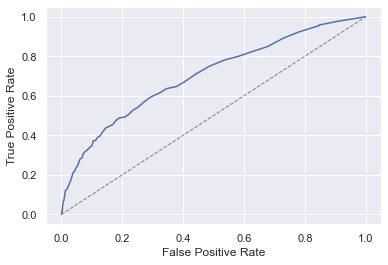

In [33]:
fpr, tpr, _ = roc_curve(test_y, probabilities[:, 1])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [34]:
def predict_delay(departure_date_time, origin, destination):
    from datetime import datetime

    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)

    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour

    origin = origin.upper()
    destination = destination.upper()

    input = [{'MONTH': month,
              'DAY': day,
              'DAY_OF_WEEK': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_ATL': 1 if origin == 'ATL' else 0,
              'ORIGIN_DTW': 1 if origin == 'DTW' else 0,
              'ORIGIN_JFK': 1 if origin == 'JFK' else 0,
              'ORIGIN_MSP': 1 if origin == 'MSP' else 0,
              'ORIGIN_SEA': 1 if origin == 'SEA' else 0,
              'DEST_ATL': 1 if destination == 'ATL' else 0,
              'DEST_DTW': 1 if destination == 'DTW' else 0,
              'DEST_JFK': 1 if destination == 'JFK' else 0,
              'DEST_MSP': 1 if destination == 'MSP' else 0,
              'DEST_SEA': 1 if destination == 'SEA' else 0 }]

    return model.predict_proba(pd.DataFrame(input))[0][0]

In [35]:
predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL')

0.88

In [36]:
predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL')

0.87

In [37]:
predict_delay('2/10/2018 10:00:00', 'ATL', 'SEA')

0.99

(0.0, 1.0)

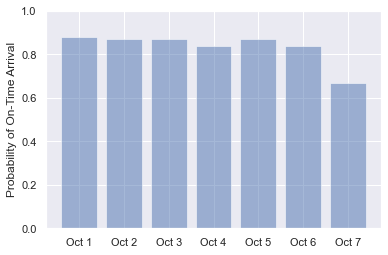

In [45]:
import numpy as np

labels = ('Oct 1', 'Oct 2', 'Oct 3', 'Oct 4', 'Oct 5', 'Oct 6', 'Oct 7')
values = (predict_delay('1/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('2/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('3/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('4/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('5/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('6/10/2018 21:45:00', 'JFK', 'ATL'),
          predict_delay('7/10/2018 21:45:00', 'JFK', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

(0.0, 1.0)

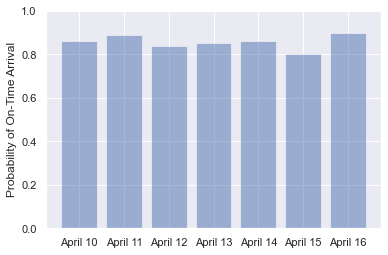

In [44]:
import numpy as np

labels = ('April 10', 'April 11', 'April 12', 'April 13', 'April 14', 'April 15', 'April 16')
values = (predict_delay('10/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('11/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('12/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('13/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('14/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('15/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('16/04/2018 13:00:00', 'JFK', 'MSP'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

(0.0, 1.0)

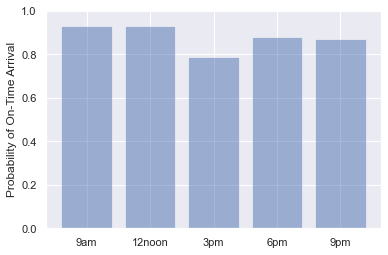

In [46]:
import numpy as np

labels = ('9am', '12noon', '3pm', '6pm', '9pm')
values = (predict_delay('30/01/2018 09:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2018 12:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2018 15:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2018 18:00:00', 'SEA', 'ATL'),
          predict_delay('30/01/2018 21:00:00', 'SEA', 'ATL'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels, labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

([<matplotlib.patches.Wedge at 0xc67b0e8>,
 [Text(0.8860887187648293, 0.6518027174519169, 'S-A'),
  Text(-0.31202784558537505, 1.0548168673183747, 'A-D'),
  Text(-1.0999700869759472, 0.008112198106999612, 'D-J'),
  Text(-0.3736802785866346, -1.034583514944741, 'J-M'),
  Text(0.8512754342867517, -0.69665639664034, 'M-S')],
 [Text(0.4833211193262704, 0.35552875497377284, '20.2%'),
  Text(-0.17019700668293183, 0.5753546549009315, '18.8%'),
  Text(-0.5999836838050621, 0.004424835331090697, '21.8%'),
  Text(-0.20382560650180068, -0.5643182808789496, '17.4%'),
  Text(0.46433205506550085, -0.3799943981674581, '21.8%')])

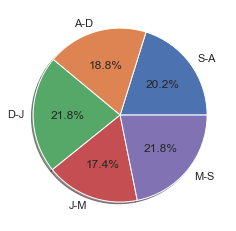

In [53]:
labels = ('S-A', 'A-D', 'D-J', 'J-M', 'M-S')
values = (predict_delay('01/01/2018 00:00:00', 'SEA', 'ATL'),
          predict_delay('01/01/2018 00:00:00', 'ATL', 'DTW'),
          predict_delay('01/01/2018 00:00:00', 'DTW', 'JFK'),
          predict_delay('01/01/2018 00:00:00', 'JFK', 'MSP'),
          predict_delay('01/01/2018 00:00:00', 'MSP', 'SEA'))
alabels = np.arange(len(labels))
plt.pie(values, autopct='%0.01f%%', shadow=True, labels=labels)


<AxesSubplot:>

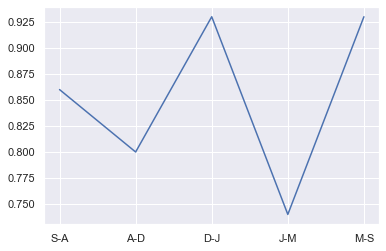

In [55]:
labels = ('S-A', 'A-D', 'D-J', 'J-M', 'M-S')
values = (predict_delay('01/01/2018 00:00:00', 'SEA', 'ATL'),
          predict_delay('01/01/2018 00:00:00', 'ATL', 'DTW'),
          predict_delay('01/01/2018 00:00:00', 'DTW', 'JFK'),
          predict_delay('01/01/2018 00:00:00', 'JFK', 'MSP'),
          predict_delay('01/01/2018 00:00:00', 'MSP', 'SEA'))
sns.lineplot(x=labels,y=values)

<AxesSubplot:>

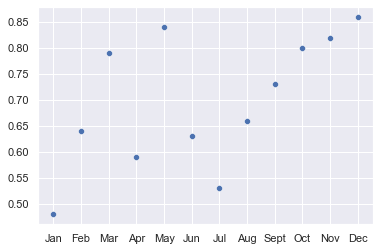

In [57]:
labels = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec')
values = (predict_delay('01/01/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('01/02/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('01/03/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('01/04/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('01/05/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('01/06/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('01/07/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('01/08/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('01/09/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('01/10/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('01/11/2018 13:00:00', 'JFK', 'MSP'),
          predict_delay('01/12/2018 13:00:00', 'JFK', 'MSP'))
sns.scatterplot(x=labels, y=values)